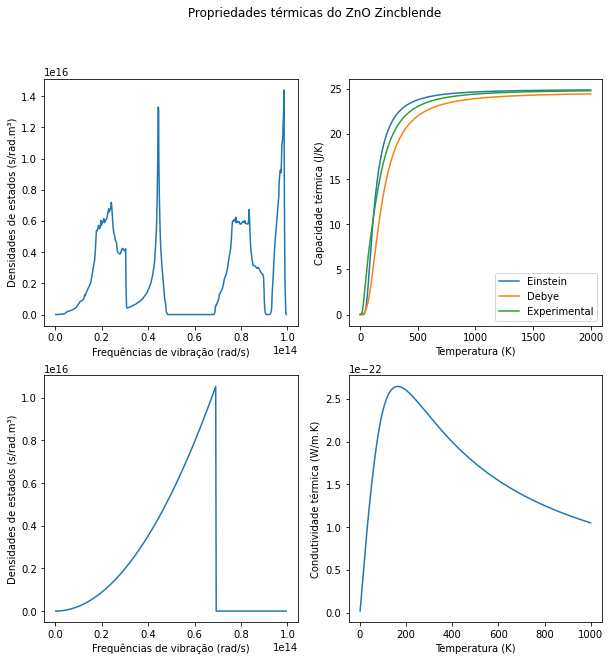

In [5]:
from extracaoDados import*
from modulo1 import*
from modulo2 import*
from modulo3 import*
from modulo4 import*
import warnings
import numpy as np
import matplotlib.pyplot as plt

#o numpy gera um aviso de estar usando o exponencial de um grande numero,
#mas o modulo lida normalmente com o calculo, logo podemos ignorar o aviso
warnings.filterwarnings('ignore')

#lendo os dados das frequências de vibração e densidades de estado do ZnO Zincblende
arquivo_zno_zincblende = open("dadosZnO_zincblende.txt")
omega_zno_zb = []
densidade_estados_zno_zb = []
ler_dados(omega_zno_zb, densidade_estados_zno_zb, arquivo_zno_zincblende)

#calculando a média das frequências de vibração para utilizar no modelo de Einstein
omega_zno_zb_einstein = sum(omega_zno_zb)/len(omega_zno_zb) 

#definindo uma faixa de temperaturas
temperaturas = np.linspace(0.01,2000,10000)

#calculando as capacidades térmicas para os diferentes modelos, sabendo que a 
#velocidade do som no ZnO zincblende é 4100 m/s (fonte:https://www.ipen.br/biblioteca/cd/ptech/2005/PDF/15_08.PDF)
# e que sua densidade atômica é 8.134e28 átomos/m³

cv_zno_zb_einstein = cv_einstein(omega_zno_zb_einstein, 6.02e23,temperaturas)
cv_zno_zb_debye = cv_debye(omega_zno_zb, temperaturas, 4100, 6.02e23, 8.134e28)
cv_zno_zb_experimental = cv_densidade_experimental(omega_zno_zb, densidade_estados_zno_zb, temperaturas, 8.134e28)

#densidade de estados de Debye 
densidade_debye_zno_zb = densidade_debye(omega_zno_zb, 4100, 8.134e28)

#faixa de temperatruas para a condutividade térmica e o cálculo desta
k_temp = np.linspace(1,1000,2000)
k_zno_zb = condutiv(omega_zno_zb, k_temp, 4100, 8.134e28)

#plotando as densidades de estados experimentais, os resultados das capacidades térmicas de 0.01 a 2000 K, 
# a densidade de estados para o modelo de Debye e a condutividade térmica do Ócido de Zinco, de organização
# estrutural do tipo Zincblende de 1 a 1000K
fig, ax = plt.subplots(2,2, figsize=(10,10))

fig.suptitle('Propriedades térmicas do ZnO Zincblende')

ax[0][0].plot(omega_zno_zb,densidade_estados_zno_zb)
ax[0][0].set_xlabel('Frequências de vibração (rad/s)')
ax[0][0].set_ylabel('Densidades de estados (s/rad.m³)')

ax[0][1].plot(temperaturas, cv_zno_zb_einstein, label='Einstein')
ax[0][1].plot(temperaturas, cv_zno_zb_debye, label='Debye')
ax[0][1].plot(temperaturas, cv_zno_zb_experimental, label='Experimental')
ax[0][1].set_xlabel('Temperatura (K)')
ax[0][1].set_ylabel('Capacidade térmica (J/K)')
ax[0][1].legend()

ax[1][0].plot(omega_zno_zb, densidade_debye_zno_zb)
ax[1][0].set_xlabel('Frequências de vibração (rad/s)')
ax[1][0].set_ylabel('Densidades de estados (s/rad.m³)')

ax[1][1].plot(k_temp, k_zno_zb)
ax[1][1].set_xlabel('Temperatura (K)')
ax[1][1].set_ylabel('Condutividade térmica (W/m.K)')

plt.show()